In [1]:
import sys
sys.path.append(r'../')

from hao.Instruction_ViT import Instruction_ViT
# from data_ISIC import ISICDataModule
import hao.utils as u
from hao.CLIP import CLIP
import torch
from d2l import torch as d2l

In [2]:
img_size, patch_size, batch_size = 64, 16, 128
num_workers = 4
max_epochs = 50
use_bias = False
restart_train = False
gpu_idx = 0
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 256, 1024, 8, 3
emb_dropout, blk_dropout, lr = 0.1, 0.1, 1e-4
last_model_path = r'Instruction_pth/last_model.pth'
best_model_path = r'Instruction_pth/best_model.pth'
categories = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
texts = [f'a photo of {c}' for c in categories]
num_classes = len(categories)


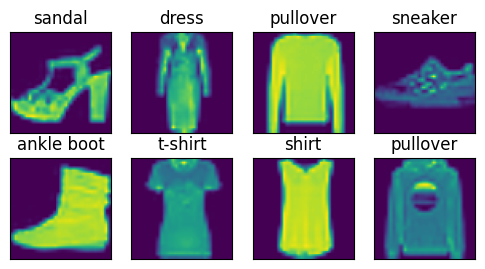

In [3]:
data = d2l.FashionMNIST(batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

In [4]:
model = Instruction_ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, texts, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)
trainer.fit(model, data)

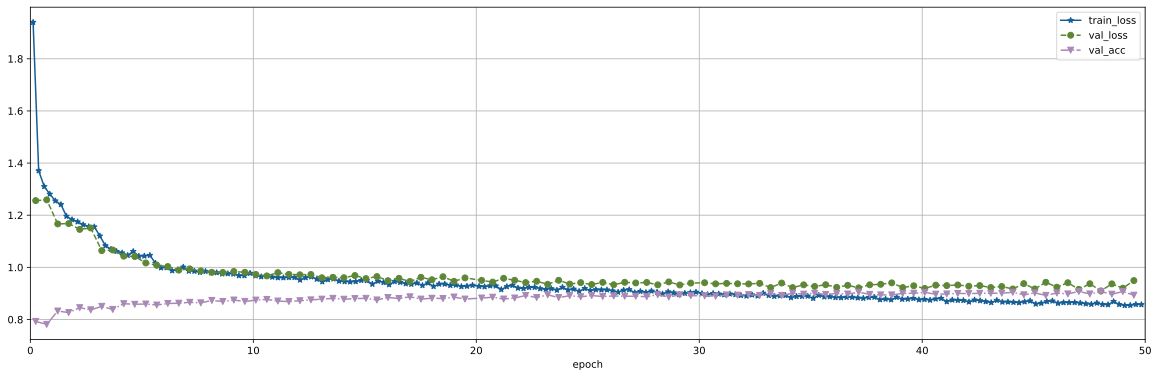

In [5]:
model.board.draw_his(figsize=(8 * (max_epochs / 20), 6))

In [6]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 1.4752 val loss 1.2551 val acc 78.80%
Epoch 2 : train loss 1.2185 val loss 1.1675 val acc 82.95%
Epoch 3 : train loss 1.1622 val loss 1.1462 val acc 84.27%
Epoch 4 : train loss 1.0831 val loss 1.0624 val acc 84.42%
Epoch 5 : train loss 1.0516 val loss 1.0411 val acc 85.96%
Epoch 6 : train loss 1.0253 val loss 1.0108 val acc 85.78%
Epoch 7 : train loss 0.9943 val loss 0.9954 val acc 86.15%
Epoch 8 : train loss 0.9841 val loss 0.9891 val acc 86.51%
Epoch 9 : train loss 0.9774 val loss 0.9805 val acc 87.26%
Epoch 10: train loss 0.9726 val loss 0.9817 val acc 87.08%
Epoch 11: train loss 0.9649 val loss 0.9703 val acc 87.58%
Epoch 12: train loss 0.9615 val loss 0.9785 val acc 86.87%
Epoch 13: train loss 0.9566 val loss 0.9699 val acc 87.38%
Epoch 14: train loss 0.9509 val loss 0.9598 val acc 88.07%
Epoch 15: train loss 0.9466 val loss 0.9644 val acc 87.94%
Epoch 16: train loss 0.9429 val loss 0.9588 val acc 87.96%
Epoch 17: train loss 0.9398 val loss 0.9545 val acc 88.0